In [1]:
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import datetime

In [8]:
import matplotlib

In [2]:
path = "../data/utci_sapporo_2011-2020.nc"
ncfile = netCDF4.Dataset(path)

In [3]:
utci = ncfile["utci"][:,:,:] - 273.15
time = ncfile["time"][:]

In [4]:
dt = 9
hours = [np.mod(i+dt,24) for i in range(24)]

In [5]:
utci_reshaped = np.empty((24,11,10,3,3))
for iyear in range(10):
    for iday in range(11):
        r = np.arange(iyear*11*24+iday*24,iyear*11*24+(iday+1)*24)
        utci_reshaped[:,iday,iyear,:,:] = utci[r,:,:]

# PLOT

Text(0.0, 1.0, 'Sapporo UTCI climatology, Aug 1-9, 2011 to 2020')

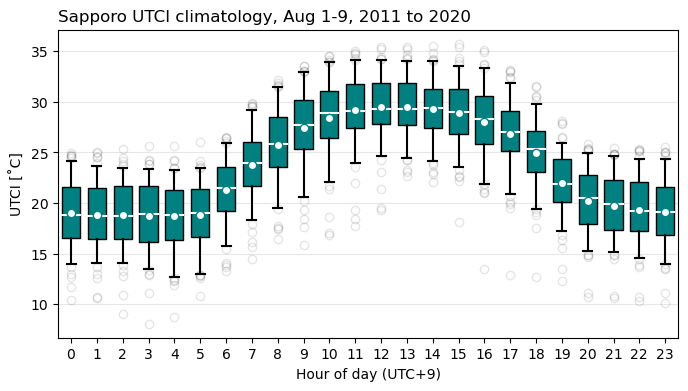

In [54]:
fig,ax = plt.subplots(figsize=(8,4))

for i in range(24):
    d = plt.boxplot(utci_reshaped[i,:10,:,1,1].flatten(),vert=True,positions=[hours[i]],widths=[0.7],
                showmeans=True, showfliers=True,patch_artist=True,whis=(5,95),
                medianprops={"color": "white", "linewidth": 1.5},
                meanprops={"markerfacecolor": "white", "markeredgecolor": "teal", "marker": "o"},
                whiskerprops={"color": "k", "linewidth": 1.5},
                boxprops={"facecolor": "teal"},
                capprops={"color": "k", "linewidth": 1.5},
                flierprops={"alpha": 0.1})
    
ax.set_xlim(-0.5,23.5)
ax.set_xlabel("Hour of day (UTC+9)")
ax.set_ylabel("UTCI [˚C]")
ax.grid(alpha=0.3,axis="y")
plt.title("Sapporo UTCI climatology, Aug 1-9, 2011 to 2020",loc="left")